In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import cv2

from scipy import ndimage
import pickle





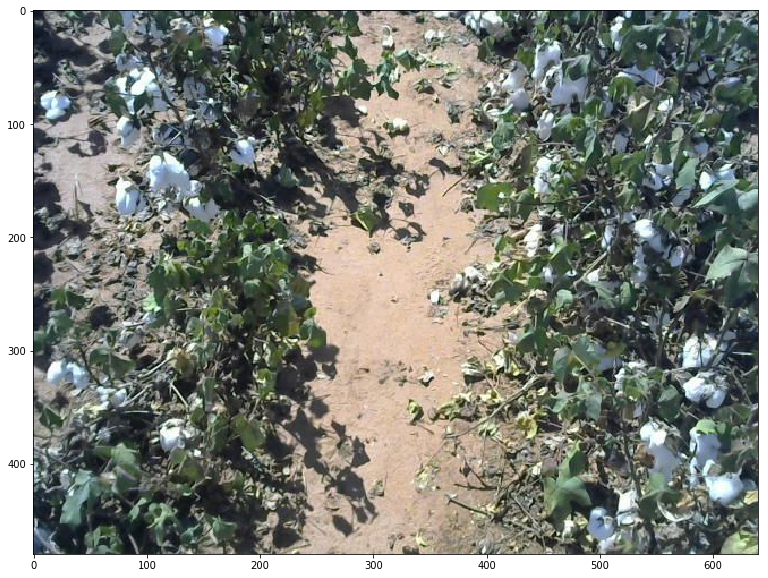

In [2]:
image = np.array(Image.open('nav_front/frame_10.jpg'))

plt.figure(figsize=(20,10))
plt.imshow(image)

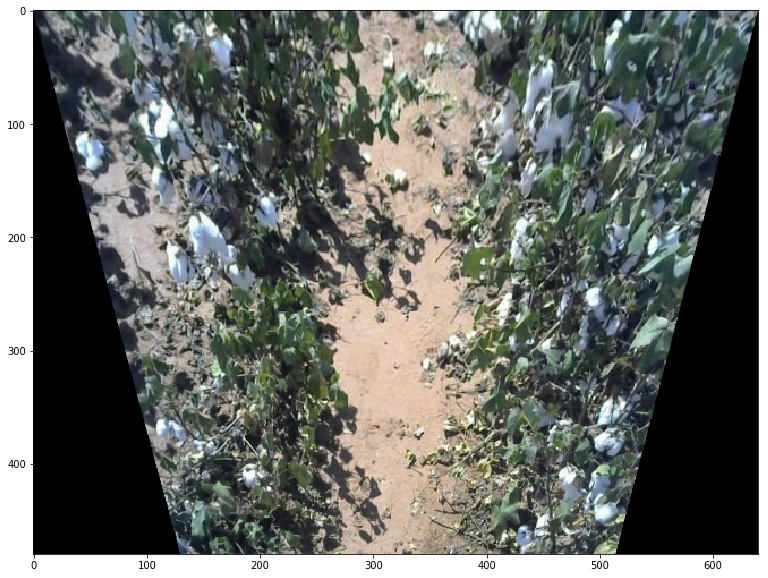

In [3]:
def skew_image(image, value = 0):

    IMAGE_H = image.shape[0]
    IMAGE_W = image.shape[1]

    aa = 250 + value
    bb = 400 + value

    src = np.float32([[200, IMAGE_H], [450, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    dst = np.float32([[aa, IMAGE_H], [bb, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    M = cv2.getPerspectiveTransform(src, dst) 

    warped_img = cv2.warpPerspective(image, M, (IMAGE_W, IMAGE_H)) 
    return warped_img

warped_img = skew_image(image, 0)
plt.figure(figsize=(20,10))
plt.imshow(warped_img) 


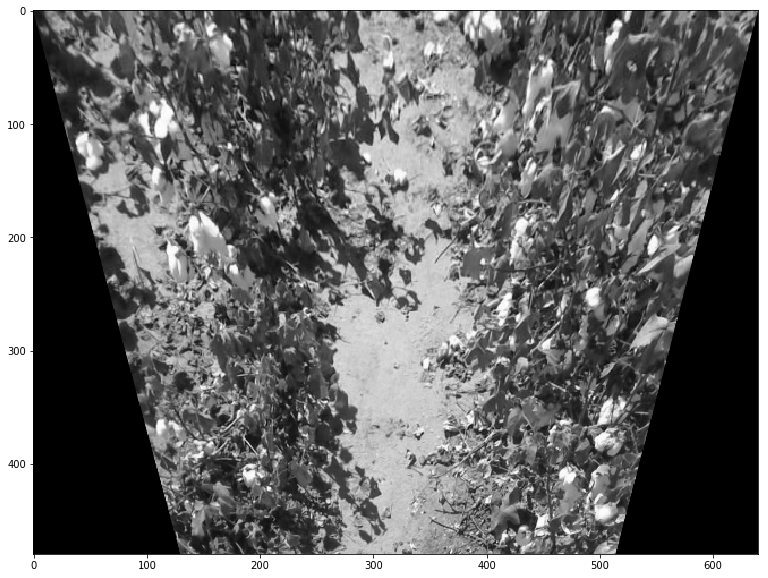

In [4]:
grayscale = cv2.cvtColor(warped_img, cv2.COLOR_RGB2GRAY)
grayscale2 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#grayscale = ~grayscale
plt.figure(figsize=(20,10))
plt.imshow(grayscale, cmap='gray')

In [5]:
def normalize(v):
    return v / np.sqrt(np.sum(v**2))

(640,)


499312572.65902346

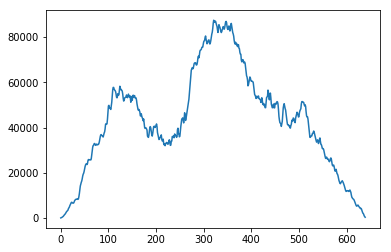

In [6]:
vector = np.sum(grayscale, axis=0)

print(vector.shape)

plt.plot(vector)

np.var(vector)

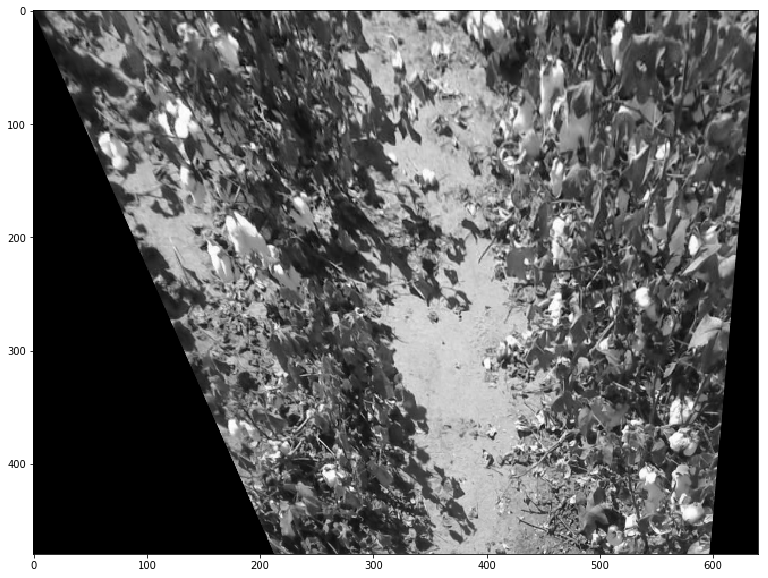

In [7]:
new_image = skew_image(grayscale2, 83)
#new_image = new_image[100:new_image.shape[0]-100, 100:new_image.shape[1]-100]
plt.figure(figsize=(20,10))
plt.imshow(new_image,cmap='gray')

(640,)


448297935.58109367

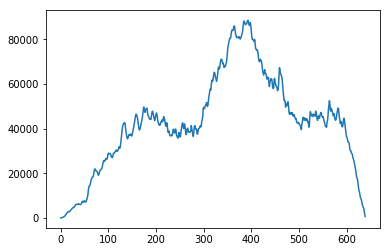

In [8]:
vector = np.sum(new_image, axis=0)

#vector = vector[50:vector.shape[0]-50]

#vector = np.true_divide(new_image.sum(0),(new_image!=0).sum(0)+1)

print(vector.shape)

plt.plot(vector)

np.var(vector)

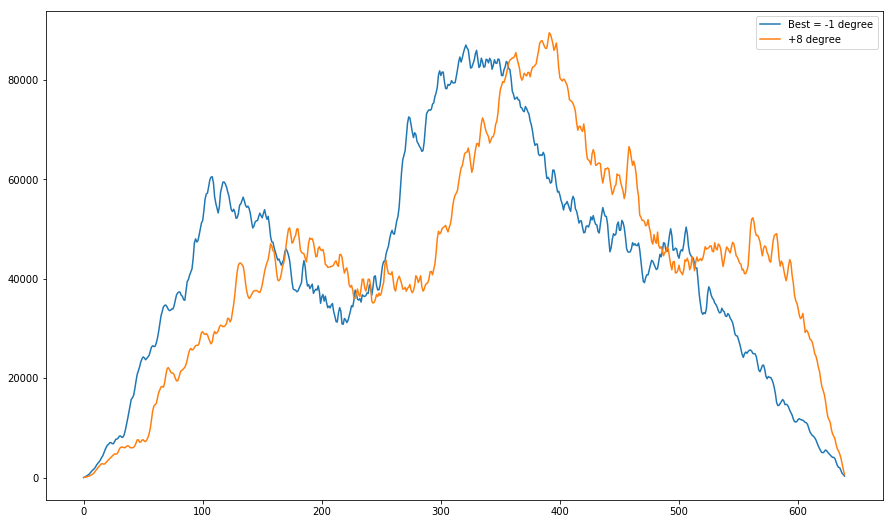

In [29]:

#theta = [(i-30) for i in range(61)]


theta = [i for i in range(-100, 101, 10)]

variance_ = []

#best_variance = np.inf
best_vector = []
best_variance = 0
best_angle = 0
plt.figure(figsize=(15,9))
for i in theta:
    new_image = skew_image(grayscale2, i)

    #new_image[new_image == 0] = np.mean(new_image)

    #new_image = new_image[100:500, 100:600]

    vector = np.sum(new_image, axis=0)
    #vector = np.true_divide(new_image.sum(0),(new_image!=0).sum(0)+1)
    #vector = vector[100:vector.shape[0]-100]

    new_variance = np.var(vector)
    variance_.append(new_variance)
    if(i == 80):
        vector80 = vector

    if(new_variance > best_variance):
        best_variance = new_variance
        best_angle = i
        best_vector = vector

    #plt.plot(vector)
#print(best_vector.shape)
#auxiliar = np.array(vector80.tolist() * 100).reshape(100, best_vector.shape[0])
#plt.imshow(auxiliar, cmap='gray')

plt.plot(best_vector, label='Best = -1 degree')
plt.plot(vector80, label='+8 degree')
plt.legend()

#print("Best angle - Max Variance")
#print(best_angle/10, best_variance)
    



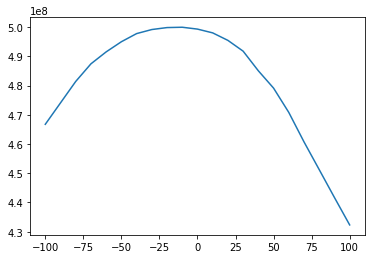

In [10]:
plt.plot(theta, variance_)

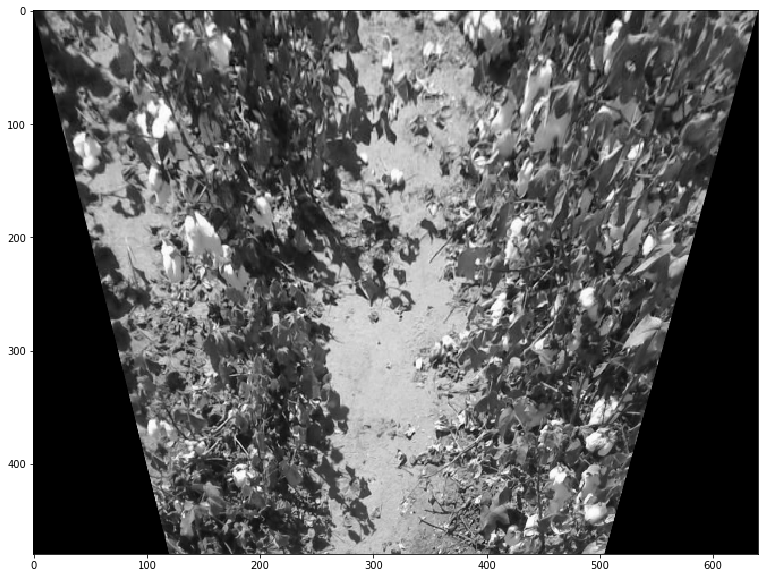

In [39]:

new_image = skew_image(grayscale2, best_angle)

#new_image[new_image == 0] = np.mean(new_image)
#new_image = new_image[100:new_image.shape[0]-100, 100:new_image.shape[1]-100]
plt.figure(figsize=(20,10))
plt.imshow(new_image,cmap='gray')

(480, 640)


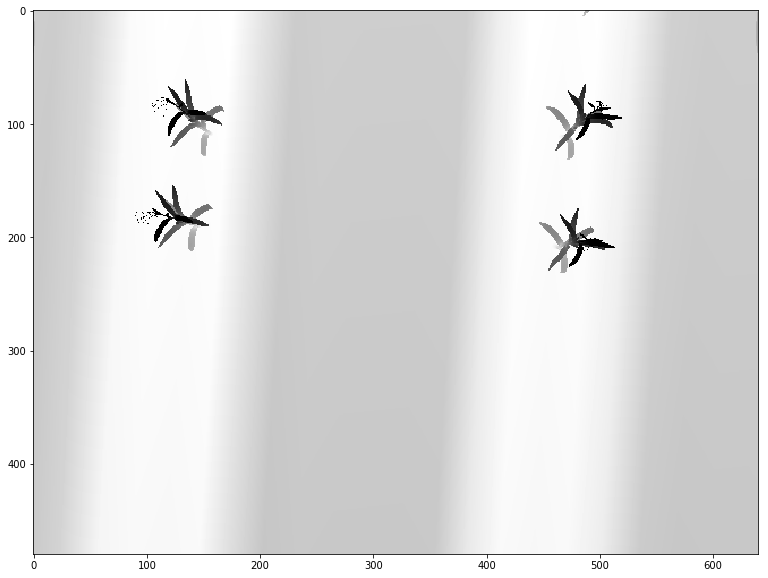

In [177]:

def normalize_image(data):

    data_n = (data - np.min(data)) / (np.max(data) - np.min(data)) * 255
    return data_n


with open('asd.pkl', 'rb') as f:
    a = pickle.load(f)

xf, yf = a.shape
x = 30
a[a<1.5] = 1.5

#a = normalize_image(a)

print(a.shape)

#img = a[:, x:xf-x]
#print(normalize_image(img).astype(np.uint8))


plt.figure(figsize=(20,10))
plt.imshow(a, cmap='gray')



vetor = np.sum(a, axis=0)

varia = np.var(vetor)

#plt.plot(vetor)
#print(varia)



Best angle - Max Variance
(4.0, 0.0003218279194977119)


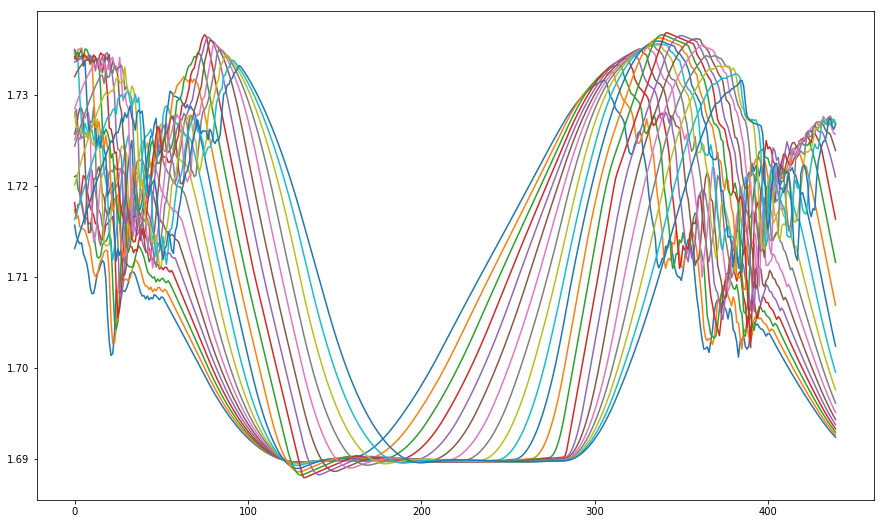

In [178]:

def skew_depth(image, value = 0):

    IMAGE_H = image.shape[0]
    IMAGE_W = image.shape[1]

    aa = 200 + value
    bb = 450 + value

    src = np.float32([[200, IMAGE_H], [450, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    dst = np.float32([[aa, IMAGE_H], [bb, IMAGE_H], [0, 0], [IMAGE_W, 0]])
    M = cv2.getPerspectiveTransform(src, dst) 

    warped_img = cv2.warpPerspective(image, M, (IMAGE_W, IMAGE_H)) 
    return warped_img

#theta = [(i-30) for i in range(61)]


theta = [i for i in range(-100, 101, 10)]

variance_ = []

#best_variance = np.inf
best_variance = 0
best_angle = 0
plt.figure(figsize=(15,9))
for i in theta:
    new_image = skew_depth(a, i)
    #new_image[new_image == 0] = np.nan

    #new_image[np.isnan(new_image)] = np.nanmean(new_image)

    #print(new_image)

    #new_image = new_image[100:500, 100:600]

    #vector = np.sum(new_image, axis=0)
    vector = np.true_divide(new_image.sum(0),(new_image!=0).sum(0)+1)
    vector = vector[100:vector.shape[0]-100]

    new_variance = np.var(vector)
    variance_.append(new_variance)

    if(new_variance > best_variance):
        best_variance = new_variance
        best_angle = i

    plt.plot(vector)

print("Best angle - Max Variance")
print(best_angle/10., best_variance)
    



In [162]:
teste = np.array([1, np.nan])

teste[np.isnan(teste)] = 2



print(teste)

[1. 2.]


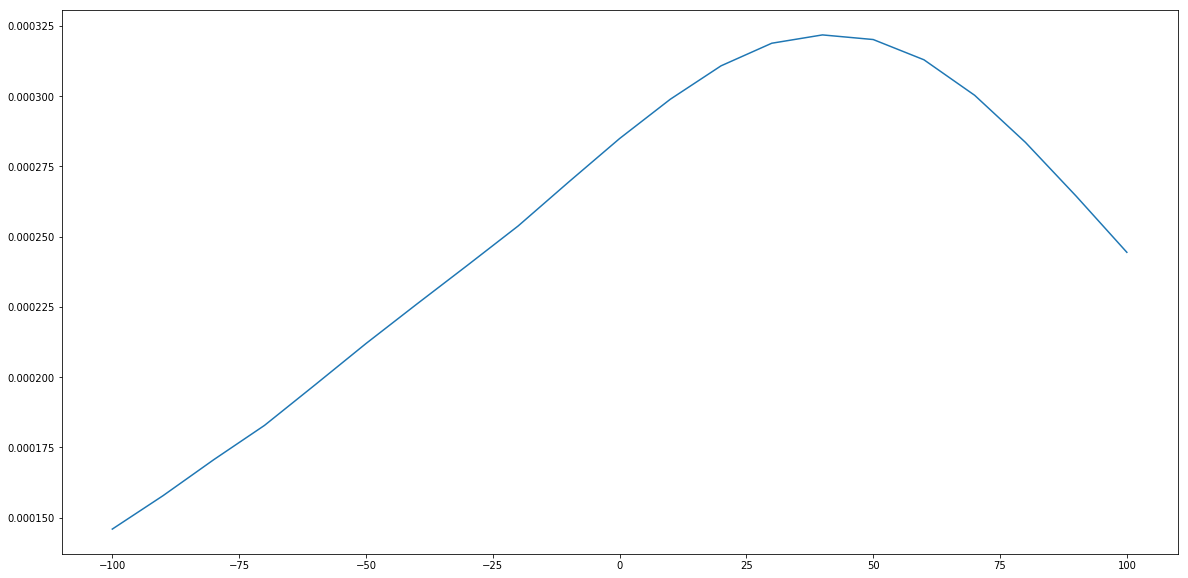

In [179]:
plt.figure(figsize=(20,10))
plt.plot(theta, variance_)

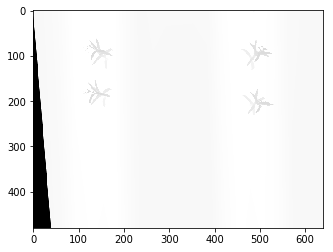

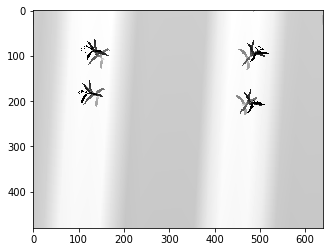

In [180]:
plt.figure()
plt.imshow(skew_depth(a, 40), cmap='gray')
plt.figure()
plt.imshow(skew_depth(a, 0), cmap='gray')

[[251 251 249 ... 246 245 239]
 [251 251 249 ... 250 246 245]
 [251 251 249 ... 255 251 251]
 ...
 [249 249 253 ...  71  71  71]
 [253 253 253 ...  71  71  74]
 [253 253 253 ...  71  71  76]]
[[ 2.3  2.9  3.2 ... 25.3 34.3 47.2]
 [ 2.   2.3  2.6 ... 30.  34.  38.5]
 [ 1.4  1.7  2.  ... 34.3 31.4 30.5]
 ...
 [-0.4 -1.  -3.2 ... 33.5 28.7 26. ]
 [-2.6 -2.6 -2.9 ... 26.  21.5 15.6]
 [-3.8 -3.2 -2.3 ... 23.3 19.1 12.3]]
[[248.7 248.1 245.8 ... 220.7 210.7 191.8]
 [249.  248.7 246.4 ... 220.  212.  206.5]
 [249.6 249.3 247.  ... 220.7 219.6 220.5]
 ...
 [249.4 250.  256.2 ...  37.5  42.3  45. ]
 [255.6 255.6 255.9 ...  45.   49.5  58.4]
 [256.8 256.2 255.3 ...  47.7  51.9  63.7]]


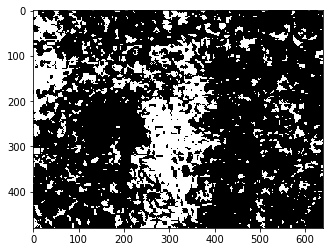

In [38]:


def exg(image):



    return  2*image[:,:,1] - image[:,:,0] - image[:,:,2]

def exr(image):
    return 1.3 * image[:,:,0] - image[:,:,1]   


def exgexr(image, th = 100):
    #print(exg(image))
    #print(exr(image))
    aux = exg(image) - exr(image)
    #print(aux)
    aux[aux < th] = 0
    aux[aux >= th] = 1
    return aux

plt.imshow(exgexr(image), cmap='gray')


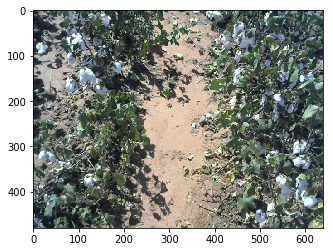

In [13]:
plt.imshow(image)

In [13]:
def cross_correlation(a,b):
    a = (a - np.mean(a)) / (np.std(a) * len(a))
    b = (b - np.mean(b)) / (np.std(b))
    return np.correlate(a, b, 'full')
